In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.|

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from nltk.corpus import stopwords

# some linear models
from sklearn.linear_model import LogisticRegression, BayesianRidge

# SCM for classification
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
np.random.seed(2019)

In [3]:
# run once to download data
# import nltk
# nltk.download()

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_cat=pd.read_json('categories.json')

In [6]:
df_train['Group']=df_train.image_path.map(lambda x: x[:7])
df_test['Group']=df_test.image_path.map(lambda x: x[:7])

In [7]:
train,test=train_test_split(df_train,random_state=2019,stratify=df_train.Category,test_size=0.2)

In [8]:
# Let's check few examples
for i in range(10):
    print(train.title.iloc[i])

btb new blus casual wanita tanpa lengan dengan bahan sifon dan potongan longgar bergaya sexy
iphone 7 plus 128gb red fullset original
sale ben nye neutral set colorless powder poudre incolore 25 g
terlaris dermovate cream hijau original
termurah mini dress brokat gaun pesta murah party wanita
samasung s7 flat
obral 2018 new cotton checkered plaid blouses shirt cage female long sleeve casual slim women
marcks bedak tabur 20 g new cn86
new loreal paris true match blur cream 25ml stok terbatas
sweater kaos hoodie lengan panjang bahan velvet untuk pria wanita


## Building seperate models for each Groupb

In [9]:
ignore_words = set(stopwords.words('english')).union(set(stopwords.words('indonesian')))
print(len(ignore_words))

936


In [10]:
# let's check for all of the data. This slightly helps to reduce dimensionality
cv=CountVectorizer(stop_words=ignore_words)
cv1=CountVectorizer() # No, stop words
X_t=cv.fit_transform(train['title'])
X_t1=cv1.fit_transform(train['title'])
print('Some words are reduced by introducing stop words',X_t.shape[1],X_t1.shape[1])

Some words are reduced by introducing stop words 70586 70968


In [10]:
# let's build pipeline for parameter search in n_grams and and various models
lr=LogisticRegression()
nb=MultinomialNB()
svc=SVC()
# let's check first three and see which one is best
gnb=GaussianNB()
bnb=BernoulliNB()
br=BayesianRidge()

pipe_lr=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words)),('model',lr)])


In [12]:
%time pipe_lr.fit(train[train.Group=='beauty_'].title,train[train.Group=='beauty_'].Category)

Wall time: 1min 20s


Pipeline(memory=None,
     steps=[('vectorize', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'jang...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [13]:
%%time
test.head()

Wall time: 0 ns


,itemid,title,Category,image_path,Group
539829,1058517290,xiaomi mi a1 garansi resmi 1 tahun tam,34,mobile_image/3912586cdf51144db783b2bac1ee4d3f.jpg,mobile_
473036,286463264,blus sexy model off shoulder,26,fashion_image/cb790137111e2525cd895c3375fe84c0,fashion
252009,1537965166,best sale jafra royal jelly radiance foundatio...,1,beauty_image/5adfe3e65ad2f51a1e67db85a3de8e18.jpg,beauty_
355772,1465709373,dress midi bodycon casual elegan warna polos u...,22,fashion_image/cbedaa2404fb377dc6c271a1081f7baa,fashion
553954,1195506745,promo discon samsung galaxy s7 flat sein garan...,35,mobile_image/bb327fec3989b18f714deb3c07203fb8.jpg,mobile_


In [14]:
%%time
pred=pipe_lr.predict(test[test.Group=='beauty_'].title)

Wall time: 416 ms


In [15]:
%%time
accuracy_score(test[test.Group=='beauty_'].Category,pred)


# without removing stop words :0.76361288971858265
# removing stop_words: 0.7626009735331577

Wall time: 32.9 ms


0.7626009735331577

In [16]:
%%time
score=pipe_lr.score(test[test.Group=='beauty_'].title,test[test.Group=='beauty_'].Category)

Wall time: 446 ms


In [11]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

## Previously I have tried both TfidfVectorizer, CountVectorizer for both naive bayes and logistic regression. But it turns out that Countvectorizer with logistic regression gives best results. I have removed stop words from english and indonesian. Than, I did parameter optimization for n_grams. It turns out that best ngram_range is (1,3 for beauty and mobile products and (1,5) for fashion. 

## (1,5) might be not the most optimal we might still imporove by increasing it.


## I also run this simulation for NB. The optimal ngram_range was ... I lost it in kernel!!

## but it was smth like for mobile (1,2) and for beauty and fashion (2,5) we can do it again, it won't take much time. Score were still less than logistic regression

## I also tried svc (SVM) but it takes to much time imposimble to train espacially if there is many features



In [41]:
# Uncomment if u want to run this code but it will take a lot of time
# testing n jobs
# pipe_lr=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words)),('model',lr)])
# params={'vectorize__ngram_range':[(j,i) for j in range(1,3) for i in range(j,6)]}
# best_param={}
# best_score={}
# for group in tqdm(['beauty_','mobile_','fashion']):
#     grid_search=GridSearchCV(pipe_lr,param_grid=params, verbose=1)
#     X=df_train[df_train.Group==group].title
#     y=df_train[df_train.Group==group].Category
#     grid_search.fit(X,y)
#     best_param[group]=grid_search.best_params_
#     best_score[group]=grid_search.best_score_






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 70.8min finished





 33%|██████████████████████████                                                    | 1/3 [1:16:24<2:32:49, 4584.77s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 35.8min finished





 67%|████████████████████████████████████████████████████                          | 2/3 [1:54:44<1:04:59, 3899.33s/it]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 79.9min finished





100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [3:25:23<00:00, 4361.02s/it]

In [43]:
best_param
# {'beauty_': {'vectorize__ngram_range': (1, 3)},
#  'mobile_': {'vectorize__ngram_range': (1, 3)},
#  'fashion': {'vectorize__ngram_range': (1, 5)}}

{'beauty_': {'vectorize__ngram_range': (1, 3)},
 'mobile_': {'vectorize__ngram_range': (1, 3)},
 'fashion': {'vectorize__ngram_range': (1, 5)}}

In [44]:
best_score
#{'beauty_': 0.78295293161143542,
#  'mobile_': 0.8236574564959771,
#  'fashion': 0.6426796296802032}

{'beauty_': 0.78295293161143542,
 'mobile_': 0.8236574564959771,
 'fashion': 0.6426796296802032}

In [47]:
# Best cv scores for parameter for lr.
pipe_beauty=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,3))),('model',lr)])
pipe_mobile=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,3))),('model',lr)])
pipe_fashion=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,5))),('model',lr)])
pipe=[pipe_beauty,pipe_mobile,pipe_fashion]

In [48]:
groups=['beauty_','mobile_','fashion']
predictions={}
for i in range(3):
    model=pipe[i]
    X=df_train[df_train.Group==groups[i]].title
    y=df_train[df_train.Group==groups[i]].Category
    model.fit(X,y)
    predictions[groups[i]]=model.predict(df_test[df_test.Group==groups[i]].title)
    


In [49]:
# Let's also do it for 80 percent of data. As we did for images
predictions_val={}
predictions_test={}
for i in range(3):
    model=pipe[i]
    X=train[train.Group==groups[i]].title
    y=train[train.Group==groups[i]].Category
    model.fit(X,y)
    predictions_val[groups[i]]=model.predict(test[test.Group==groups[i]].title)
    predictions_test[groups[i]]=model.predict(df_test[df_test.Group==groups[i]].title)


In [82]:
def submission(name,dic):
    df_sub=df_test.copy()
    for group in dic.keys():
        df_sub.loc[df_sub.Group==group,'Category']=dic[group]
    df_sub.loc[:,'Category']=df_sub.Category.astype('int')
    df_sub[['itemid','Category']].to_csv(name,index=False)

In [83]:
# Let's check accuracy in validation set
for group in predictions_val.keys():
    test_=test.copy()
    test_.loc[test_.Group==group,'Category']=predictions_val[group]
print(accuracy_score(test.Category,test_.Category))
# Wow results seems to be impressive 0.884536051544

0.884536051544


In [84]:
# LB: 0.75599
# Trained to 80% of data
submission('first_nlp_submission.csv',predictions_test)

In [87]:
# Trained to all data: 0.76140
# Trained to all data. Improved to 0.0054

submission('2_nlp_all_data.csv',predictions)

In [98]:
# We need to save predict proba for both validation and test set. also save for predict proba for 

predict_proba_val={}
predict_proba_test={}
classes={}
for i in range(3):
    model=pipe[i]
    X=train[train.Group==groups[i]].title
    y=train[train.Group==groups[i]].Category
    model.fit(X,y)
    classes[groups[i]]=model.classes_
    predictions_val[groups[i]]=model.predict_proba(test[test.Group==groups[i]].title)
    predictions_test[groups[i]]=model.predict_proba(df_test[df_test.Group==groups[i]].title)

In [135]:
# Saving probabilities of validation set
for i in range(3):
    df=pd.DataFrame(predictions_val[groups[i]])
    df.columns=classes[groups[i]]
    df['pred']=df.idxmax(axis=1) # do it before placing itemid or category otherwise column type will become string type
    df['itemid']=test[test.Group==groups[i]].itemid.values # values is essensial since indexes are different
    df['Category']=test[test.Group==groups[i]].Category.values
    df.to_csv(groups[i]+'_val_proba_nlp.csv',index=False)
    

In [232]:
for i in range(3):
    df=pd.DataFrame(predictions_test[groups[i]])
    df.columns=classes[groups[i]]
    df['pred']=df.idxmax(axis=1)
    df['itemid']=df_test[df_test.Group==groups[i]].itemid.values
    df.to_csv(groups[i]+'_test_proba_nlp.csv',index=False)

In [146]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib notebook
from sklearn.metrics import confusion_matrix

In [189]:
groups

['beauty_', 'mobile_', 'fashion']

In [190]:
# Similar names for columns as groups
df_cat.columns=['beauty_','fashion','mobile_']

In [191]:
def plot_confusion(group):
    df_val=pd.read_csv(group+'_val_proba_nlp.csv')
    confusion=confusion_matrix(df_val['Category'],df_val['pred'])
    labels=df_cat[group].dropna().astype('int').sort_values().index
    sns.heatmap(confusion,annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5,xticklabels=labels,yticklabels=labels)


<IPython.core.display.Javascript object>


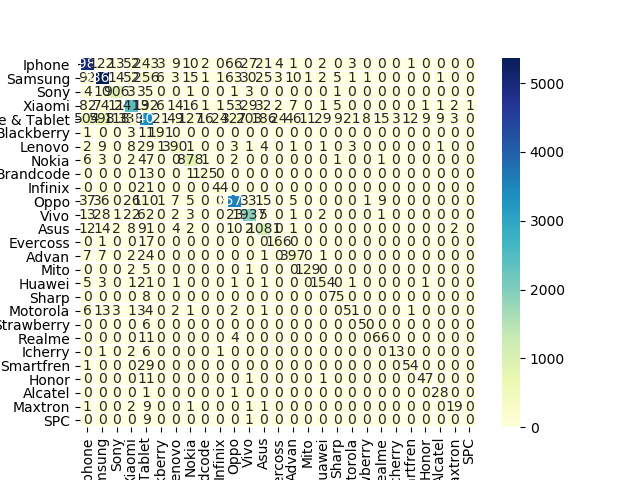

In [195]:
# 
plot_confusion('mobile_')

## Let's predict with naive bayes approach

In [202]:
# Uncomment if u want to run this code but it will take a lot of time

pipe_nb=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words)),('model',nb)])
params={'vectorize__ngram_range':[(j,i) for j in range(1,4) for i in range(j,7)]}
best_param_nb={}
best_score_nb={}
for group in tqdm(['beauty_','mobile_','fashion']):
    grid_search=GridSearchCV(pipe_nb,param_grid=params, verbose=1)
    X=df_train[df_train.Group==group].title
    y=df_train[df_train.Group==group].Category
    grid_search.fit(X,y)
    best_param_nb[group]=grid_search.best_params_
    print(group+ ' best parameters :',grid_search.best_params_ )
    best_score_nb[group]=grid_search.best_score_
    print(group+ ' best score :',grid_search.best_score_)







  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  7.3min finished


beauty_ best parameters : {'vectorize__ngram_range': (2, 6)}
beauty_ best score : 0.759556568254








 33%|███████████████████████████▋                                                       | 1/3 [07:28<14:56, 448.42s/it]

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.9min finished


mobile_ best parameters : {'vectorize__ngram_range': (1, 2)}
mobile_ best score : 0.776423626271








 67%|███████████████████████████████████████████████████████▎                           | 2/3 [12:25<06:43, 403.06s/it]

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  8.8min finished


fashion best parameters : {'vectorize__ngram_range': (2, 6)}
fashion best score : 0.585465767267








100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [21:31<00:00, 445.87s/it]

In [203]:
print(best_param_nb)
print(best_score_nb)
# {'beauty_': {'vectorize__ngram_range': (2, 6)}, 'mobile_': {'vectorize__ngram_range': (1, 2)}, 'fashion': {'vectorize__ngram_range': (2, 6)}}
# {'beauty_': 0.75955656825422302, 'mobile_': 0.7764236262708164, 'fashion': 0.58546576726657018}

{'beauty_': {'vectorize__ngram_range': (2, 6)}, 'mobile_': {'vectorize__ngram_range': (1, 2)}, 'fashion': {'vectorize__ngram_range': (2, 6)}}
{'beauty_': 0.75955656825422302, 'mobile_': 0.7764236262708164, 'fashion': 0.58546576726657018}


In [204]:
pipe_nb_beauty=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(2,6))),('model',nb)])
pipe_nb_mobile=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,2))),('model',nb)])
pipe_nb_fashion=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(2,6))),('model',nb)])

pipe_nb_all=[pipe_nb_beauty,pipe_nb_mobile,pipe_nb_fashion]


In [219]:
groups

['beauty_', 'mobile_', 'fashion']

In [205]:
# Let's get predictions and predict proba for naive bayes approch
pred_nb_proba_val={}
pred_nb_proba_test={}
classes={}
for i in range(3):
    model=pipe_nb_all[i]
    X=train[train.Group==groups[i]].title
    y=train[train.Group==groups[i]].Category
    model.fit(X,y)
    classes[groups[i]]=model.classes_
    pred_nb_proba_val[groups[i]]=model.predict_proba(test[test.Group==groups[i]].title)
    pred_nb_proba_test[groups[i]]=model.predict_proba(df_test[df_test.Group==groups[i]].title)

In [206]:
# Saving probabilities of validation set
for i in range(3):
    df=pd.DataFrame(pred_nb_proba_val[groups[i]])
    df.columns=classes[groups[i]]
    df['pred']=df.idxmax(axis=1) # do it before placing itemid or category otherwise column type will become string type
    df['itemid']=test[test.Group==groups[i]].itemid.values # values is essensial since indexes are different
    df['Category']=test[test.Group==groups[i]].Category.values
    df.to_csv(groups[i]+'_val_proba_nlp_nb.csv',index=False)
    

In [230]:
# Saving Predictions for final test set
for i in range(3):
    df=pd.DataFrame(pred_nb_proba_test[groups[i]])
    df.columns=classes[groups[i]]
    df['pred']=df.idxmax(axis=1)
    df['itemid']=df_test[df_test.Group==groups[i]].itemid.values
    df.to_csv(groups[i]+'_test_proba_nlp_nb.csv',index=False)

In [234]:
## Now let's try ensembling
## Predict proba values are extreme it will be hard to use them for ensembling
df=pd.read_csv('fashion_test_proba_nlp_nb.csv')
df.head()

,17,18,19,20,21,22,23,24,25,26,27,28,29,30,pred,itemid
0,6.720209e-43,1.000000,6.149509e-34,3.309461e-25,2.752949e-26,1.695179e-24,2.027707e-44,6.182425e-40,1.329289e-25,6.679208e-24,5.952756e-33,4.125224e-38,8.234526e-40,1.453271e-44,18,670968580
1,4.075469e-37,1.000000,1.932446e-25,6.487402e-09,1.458588e-14,1.090629e-14,4.815468e-40,3.591847e-25,2.738468e-16,2.619602e-14,4.532866e-17,1.365040e-26,2.068206e-31,1.270402e-35,18,475599610
2,4.146882e-23,1.000000,2.141677e-14,9.282700e-11,3.845574e-07,3.441676e-08,1.585585e-23,1.909405e-14,3.356453e-09,1.760287e-11,4.032022e-12,7.451022e-16,3.550435e-17,5.839274e-21,18,1652671018
3,2.718293e-54,1.000000,9.744483e-29,1.426167e-11,1.814553e-16,3.252939e-13,1.022717e-42,2.185748e-34,7.387602e-20,1.746652e-20,1.046630e-25,3.519806e-25,2.050690e-34,6.939551e-52,18,1705634904
4,3.974198e-13,0.996962,5.236210e-08,2.294817e-06,1.710155e-07,1.289462e-04,4.849529e-13,2.216650e-10,1.897201e-05,2.887897e-03,2.958207e-09,2.041948e-13,3.297127e-13,1.762035e-13,18,1789421087


In [245]:
df_image_beauty=pd.read_csv('val_beauty.csv')
df_nlp=pd.read_csv('beauty__val_proba_nlp.csv')

In [263]:
# Accuracy of image prediction
accuracy_score(df_image_beauty.Category,df_image_beauty.final_pred)

0.6406476263586719

In [265]:
#nlp accuracy
accuracy_score(df_nlp.Category,df_nlp.pred)

0.78843972992305944

In [254]:
df_image_beauty.loc[:,[str(i) for i in range(17)]].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000922,0.063919,0.075449,0.579613,0.063179,0.118592,0.000373,0.002519,0.002103,0.009568,0.000129,0.002412,0.036417,0.015067,0.011914,0.000337,0.017487
1,0.016552,0.028079,0.275765,0.210556,0.026311,0.011866,0.011437,0.027535,0.285640,0.007712,0.000746,0.091571,0.003485,0.000700,0.000629,0.000639,0.000780
2,0.001821,0.001831,0.001431,0.007295,0.022690,0.001862,0.000222,0.004479,0.000819,0.003514,0.000504,0.000466,0.764857,0.050797,0.099181,0.008131,0.030099
3,0.019760,0.051505,0.006417,0.043640,0.609103,0.086127,0.002845,0.019252,0.018621,0.044650,0.002228,0.005470,0.037858,0.023969,0.008131,0.001418,0.019008
4,0.171279,0.184560,0.060845,0.159701,0.058774,0.020588,0.052695,0.024520,0.146287,0.017349,0.000596,0.099867,0.001841,0.000397,0.000278,0.000162,0.000261


In [270]:
X1=df_image_beauty.loc[:,[str(i) for i in range(17)]].copy()
X1.columns=[i for i in range(17)]

In [266]:
df_nlp.iloc[:,0:17].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000027,0.896262,0.000033,0.000010,0.001904,0.100763,0.000003,0.000463,0.000023,0.000169,0.000036,0.000199,0.000021,0.000003,0.000013,0.000013,0.000058
1,0.000825,0.005611,0.003361,0.961518,0.010616,0.001984,0.000567,0.006267,0.002280,0.003172,0.000170,0.000419,0.002085,0.000285,0.000516,0.000143,0.000179
2,0.001282,0.091998,0.272629,0.490585,0.015732,0.111034,0.001554,0.005411,0.002612,0.001932,0.000262,0.000681,0.002210,0.000432,0.001130,0.000267,0.000249
3,0.000192,0.026769,0.000271,0.018368,0.001578,0.930594,0.000010,0.001087,0.000201,0.011185,0.000008,0.008811,0.000718,0.000030,0.000019,0.000007,0.000151
4,0.000273,0.053303,0.000145,0.001818,0.009964,0.014201,0.001225,0.000228,0.000170,0.917750,0.000064,0.000088,0.000141,0.000127,0.000161,0.000067,0.000278


In [271]:
X2=df_nlp.iloc[:,0:17].copy()

In [300]:
score=[]
for i in range(101):
    X3=(i/100)*X2.values+(1-i/100)*X1.values
    df=pd.DataFrame(X3)
    score.append(accuracy_score(df.idxmax(axis=1),df_nlp.Category))
    
        

In [302]:
# extremely small improvement
score.index(max(score))

99

In [304]:
df_image=pd.read_csv('val_fashion.csv')
df_nlp=pd.read_csv('fashion_val_proba_nlp.csv')

In [307]:
accuracy_score(df_image.Category,df_image.final_pred)

0.49061241209804057

In [309]:
accuracy_score(df_nlp.Category,df_nlp.pred)

0.6496665983933001

In [335]:
for i in range(1,20):
    cv=CountVectorizer(stop_words=ignore_words,min_df=i)
    X=df_train[df_train.Group=='mobile_'].title
    cv.fit(X)
    print('Number of features in min_df='+str(i)+' is '+str(len(cv.get_feature_names())))

Number of features in min_df=1 is 24240
Number of features in min_df=2 is 13440
Number of features in min_df=3 is 10085
Number of features in min_df=4 is 8338
Number of features in min_df=5 is 7201
Number of features in min_df=6 is 6403
Number of features in min_df=7 is 5796
Number of features in min_df=8 is 5330
Number of features in min_df=9 is 4906
Number of features in min_df=10 is 4583
Number of features in min_df=11 is 4308
Number of features in min_df=12 is 4078
Number of features in min_df=13 is 3862
Number of features in min_df=14 is 3681
Number of features in min_df=15 is 3526
Number of features in min_df=16 is 3377
Number of features in min_df=17 is 3237
Number of features in min_df=18 is 3120
Number of features in min_df=19 is 3017


In [351]:
# Let's try to remove tune min_df
for grou

Pipeline(memory=None,
     steps=[('vectorize', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'jang...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [349]:
len(cv.get_feature_names())

7926

In [352]:
groups

['beauty_', 'mobile_', 'fashion']

In [353]:
# very minor improvement but it might be helpful to use for other groups 
# let's run it with best parameters
pipe_beauty=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,3))),('model',lr)])
pipe_mobile=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,3))),('model',lr)])
pipe_fashion=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,ngram_range=(1,5))),('model',lr)])
pipes=[pipe_beauty,pipe_mobile,pipe_fashion]

params={'vectorize__min_df':[1,2,3,4,5]}
best_param_min_df={}
best_score_min_df={}
for i in tqdm(range(len(groups))):
    grid_search=GridSearchCV(pipes[i],param_grid=params, verbose=1)
    X=df_train[df_train.Group==groups[i]].title
    y=df_train[df_train.Group==groups[i]].Category
    grid_search.fit(X,y)
    best_param_min_df[group]=grid_search.best_params_
    print(groups[i]+ ' best parameters :',grid_search.best_params_ )
    best_score_min_df[group]=grid_search.best_score_
    print(groups[i]+ ' best score :',grid_search.best_score_)
# There is almost no improvement... Online very minor for mobile min_df=2








  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 37.0min finished


beauty_ best parameters : {'vectorize__min_df': 2}
beauty_ best score : 0.783089017841









 33%|██████████████████████████▋                                                     | 1/3 [41:39<1:23:19, 2499.68s/it]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 18.5min finished


mobile_ best parameters : {'vectorize__min_df': 1}
mobile_ best score : 0.823657456496









 67%|█████████████████████████████████████████████████████▎                          | 2/3 [1:02:43<35:28, 2128.93s/it]

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 58.9min finished


fashion best parameters : {'vectorize__min_df': 1}
fashion best score : 0.64267962968









100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:12:27<00:00, 2745.37s/it]

In [354]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [368]:
bc_beauty

BaggingClassifier(base_estimator=Pipeline(memory=None,
     steps=[('vectorize', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words={'jang...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [370]:
bc_beauty=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10)
X=train[train.Group=='beauty_'].title
cv=CountVectorizer(stop_words=ignore_words,ngram_range=(1,5))
X=cv.fit_transform(X)
y=train[train.Group=='beauty_'].Category.values
bc_beauty.fit(X,y)
X_test=test[test.Group=='beauty_'].title
X_test=cv.transform(X_test)
bc_beauty.score(X_test,test[test.Group=='beauty_'].Category.values)

0.78486312961250593

In [386]:
# Single model
df=pd.read_csv('beauty__val_proba_nlp.csv')
accuracy_score(df.Category,df.pred)

0.78843972992305944

In [402]:
# Validation from image regocnition
df_im=pd.read_csv('val_beauty.csv')
accuracy_score(df_im.Category,df_im.final_pred)

0.6406476263586719

In [403]:
df_im['pred_true']=(df_im['Category']==df_im['final_pred'])

In [404]:
df_im.groupby('Category').pred_true.mean()

Category
0     0.232095
1     0.448204
2     0.663058
3     0.869169
4     0.610330
5     0.628889
6     0.034230
7     0.519280
8     0.366116
9     0.166564
10    0.246512
11    0.229927
12    0.874885
13    0.248322
14    0.010969
15    0.050000
16    0.008969
Name: pred_true, dtype: float64

In [405]:
df.groupby('Category').pred_true.mean()

Category
0     0.464191
1     0.659574
2     0.876137
3     0.903631
4     0.769033
5     0.804450
6     0.481663
7     0.757926
8     0.644628
9     0.571252
10    0.669767
11    0.624088
12    0.899679
13    0.583893
14    0.283364
15    0.208333
16    0.260090
Name: pred_true, dtype: float64

In [392]:
df['pred_true']=(df['Category']==df['pred'])

<IPython.core.display.Javascript object>


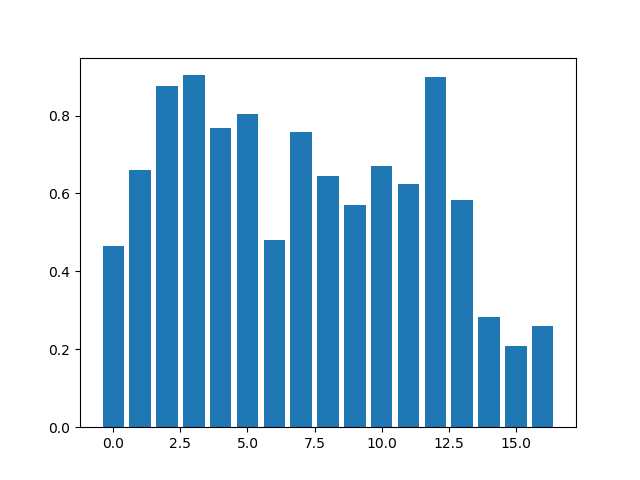

<Container object of 17 artists>

In [400]:
plt.figure()
plt.bar(height=df.groupby('Category').pred_true.mean().values,x=df.groupby('Category').pred_true.mean().index)

In [389]:
# Let's try Adaboost
bc_beauty=AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
X=train[train.Group=='beauty_'].title
cv=CountVectorizer(stop_words=ignore_words,ngram_range=(1,5))
X=cv.fit_transform(X)
y=train[train.Group=='beauty_'].Category.values
bc_beauty.fit(X,y)
X_test=test[test.Group=='beauty_'].title
X_test=cv.transform(X_test)
bc_beauty.score(X_test,test[test.Group=='beauty_'].Category.values)

0.64891742414990317

In [406]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

In [407]:
groups

['beauty_', 'mobile_', 'fashion']

In [410]:
svc

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [427]:
cv=CountVectorizer(stop_words =ignore_words)

In [428]:
X=train[train.Group=='beauty_'].title

In [429]:
X=cv.fit_transform(X)

In [430]:
X.shape

(229266, 25981)

In [12]:
groups=['beauty_','mobile_','fashion']

In [14]:
svc=SVC(C=0.1,kernel='linear')

In [15]:
svc=SVC(C=0.1,kernel='linear')
groups=['beauty_','mobile_','fashion']
pipe_beauty=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,min_df=5)),('model',svc)])
pipe_mobile=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,min_df=5)),('model',svc)])
pipe_fashion=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words,min_df=5)),('model',svc)])
pipe_svc=[pipe_beauty,pipe_mobile,pipe_fashion]

accuracy={}
for i in tqdm(range(len(groups))):
    X=train[train.Group==groups[i]].title
    y=train[train.Group==groups[i]].Category
    model=pipe_svc[i]
    model.fit(X,y)
    X_test=test[test.Group==groups[i]].title
    y_test=test[test.Group==groups[i]].Category
    y_pred=model.predict(X_test)
    accuracy[group]=accuracy_score(y_test,y_pred)
    print(groups[i]+ ' accuracy score :',accuracy_score(y_test,y_pred))



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

NameError: name 'group' is not defined

In [375]:
# Let's check accuracy in validation set
for group in predictions_val.keys():
    test_=test.copy()
    test_.loc[test_.Group==group,'Category']=predictions_val[group]
print(accuracy_score(test.Category,test_.Category))
# Wow results seems to be impressive 0.884536051544

ValueError: Must have equal len keys and value when setting with an ndarray

In [381]:
accuracy_score(test[test.Group=='beauty_'].Category,predictions_val['beauty_'])


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [314]:
# run it at night
# let's use svc with 'linear' kernel
svc=SVC(C=0.1,kernel='linear')
pipe_models=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words)),('model',svc)])
params={'model':[svc,nb,lr]}
best_param_models={}
best_score_models={}
for group in tqdm(['beauty_','mobile_','fashion']):
    grid_search=GridSearchCV(pipe_models,param_grid=params, verbose=1)
    X=df_train[df_train.Group==group].title
    y=df_train[df_train.Group==group].Category
    grid_search.fit(X,y)
    best_param_models[group]=grid_search.best_params_
    print(group+ ' best parameters :',grid_search.best_params_ )
    best_score_models[group]=grid_search.best_score_
    print(group+ ' best score :',grid_search.best_score_)







  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [295]:
accuracy_score(df.idxmax(axis=1),df_nlp.Category)

0.78826526161522759

In [ ]:
# Another simple thing to try is to ensemble with NB approach
df_all_val=pd.DataFrame()
for i in range(3):
    df=test[test.Group==groups[i]].copy()
    
df_beauty=test[test]



In [97]:
pipe[2].classes_

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [74]:
len(predictions_test['beauty_'])+len(predictions_test['mobile_'])+len(predictions_test['fashion'])

172402

In [75]:
df_sub=df_test.copy()
for group in predictions.keys():
    df_sub.loc[df_sub.Group==group,'Category']=predictions_test[group]

In [81]:
df_sub.Category.astype('int')

0          5
1          5
2          5
3          4
4          5
5          3
6          4
7          5
8          5
9          5
10         5
11         2
12         3
13         4
14         5
15         5
16         3
17         9
18         5
19         3
20         3
21         3
22         5
23         5
24         3
25         5
26         3
27         5
28         4
29         5
          ..
172372    41
172373    41
172374    38
172375    48
172376    35
172377    31
172378    44
172379    40
172380    35
172381    35
172382    35
172383    31
172384    31
172385    32
172386    35
172387    43
172388    34
172389    43
172390    31
172391    42
172392    32
172393    41
172394    42
172395    42
172396    35
172397    38
172398    31
172399    35
172400    35
172401    34
Name: Category, Length: 172402, dtype: int32

In [ ]:
# testing n jobs
pipe_lr=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words)),('model',lr)])
params={'model':[svc,lr,nb]}
best_param={}
best_score={}
for group in tqdm(['beauty_','mobile_','fashion']):
    grid_search=GridSearchCV(pipe_lr,param_grid=params, verbose=1)
    X=df_train[df_train.Group==group].title
    y=df_train[df_train.Group==group].Category
    grid_search.fit(X,y)
    best_param[group]=grid_search.best_params_
    best_score[group]=grid_search.best_score_

In [ ]:
print(best_param)
print(best_score)

In [ ]:
pipe_svc=Pipeline([('vectorize', CountVectorizer(stop_words =ignore_words)),('model',scv)])
pipe_csv.fit(df_train[df_train.Group==group])




In [24]:
grid_search.best_score_

0.78257607743655411

In [25]:
grid_search.best_score_

0.78257607743655411

In [28]:
grid_search.best_params_

{'model': MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)}

In [23]:
results['beauty_'].best_score_

0.72668650966735637

In [50]:
df_train['Group']=df_train.image_path.map(lambda x: x[:7])
df_train.head()


,itemid,title,Category,image_path,Group
0,307504,nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,beauty_
1,461203,etude house precious mineral any cushion pearl...,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,beauty_
2,3592295,milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,beauty_
3,4460167,etude house baby sweet sugar powder,3,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg,beauty_
4,5853995,bedak revlon color stay aqua mineral make up,3,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg,beauty_


In [51]:
trn_idx=train.index
val_idx=test.index

In [60]:
params={'vectorize__ngram_range':[(1,1),(1,2)],'model':[nb,lr,svc]}
grid_search=GridSearchCV(pipe_lr,param_grid=params)

In [62]:
%%time
grid_search.fit(df_train[df_train.Group=='beauty_'].title,df_train[df_train.Group=='beauty_'].Category)

Wall time: 32.1 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorize', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'yakn...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'vectorize__ngram_range': [(1, 1), (1, 2)], 'model': [MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
from tqdm import tqdm

In [ ]:
params={'vectorize__ngram_range':[(1,1),(1,2)],'model':[nb,lr,svc]}
grid_search=GridSearchCV(pipe_lr,param_grid=params)
results={}
for group in tqdm(['beauty_','mobile_','fashion']):
    X=train[train.Group==group].title
    y=train[train.Group==group].Category
    grid_search.fit(X,y)
    results[group]=grid_search

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

In [71]:
type(grid_search)


sklearn.model_selection._search.GridSearchCV

In [ ]:
trn_idx=train.index
tst_idx=test.index

In [ ]:
results={}
for group in ['beauty_','mobile_','fashion']:
    X=train[train.Group==group].title
    y=train[train.Group==group].Category
    grid_search.fit(X,y)
    results[group]=grid_search

In [65]:
grid_search


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorize', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'vectorize__ngram_range': [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], 'model': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)]},
       pre_dispatch='2*n_jobs', 